In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
zuzycieCiepla_2013 = pd.read_excel("./Zużycie ciepła_2013.xlsx")
zuzycieCiezkiegoOlejuOpalowego_2013 = pd.read_excel("./Zużycie ciężkiego oleju opałowego_2013.xlsx")
zuzycieLekkiegoOlejuOpalowego_2013 = pd.read_excel("./Zużycie lekkiego oleju opałowego_2013.xlsx")
zuzycieEnergiiElektrycznej_2013 = pd.read_excel("./Zużycie energii elektrycznej_2013.xlsx")
zuzycieGazuCieklego_2013 = pd.read_excel("./Zużycie gazu ciekłego_2013.xlsx")
zuzycieGazuZiemnego_2013 = pd.read_excel("./Zużycie gazu ziemnego_2013.xlsx")
zuzycieWeglaKamiennego_2013 = pd.read_excel("./Zużycie węgla kamiennego_2013.xlsx")

wartosciCiepla_2013 = []
for i in range(1, 17):
    wartosciCiepla_2013.append(zuzycieCiepla_2013.iloc[0][i])

wartosciCiezkiegoOlejuOpalowego_2013 = []
for i in range(1, 17):
    wartosciCiezkiegoOlejuOpalowego_2013.append(zuzycieCiezkiegoOlejuOpalowego_2013.iloc[0][i])
    
wartosciLekkiegoOlejuOpalowego_2013 = []
for i in range(1, 17):
    wartosciLekkiegoOlejuOpalowego_2013.append(zuzycieLekkiegoOlejuOpalowego_2013.iloc[0][i])
    
wartosciEnergiiElektrycznej_2013 = []
for i in range(1, 17):
    wartosciEnergiiElektrycznej_2013.append(zuzycieEnergiiElektrycznej_2013.iloc[0][i])
    
wartosciGazuCieklego_2013 = []
for i in range(1, 17):
    wartosciGazuCieklego_2013.append(zuzycieGazuCieklego_2013.iloc[0][i])
    
wartosciGazuZiemnego_2013 = []
for i in range(1, 17):
    wartosciGazuZiemnego_2013.append(zuzycieGazuZiemnego_2013.iloc[0][i])
    
wartosciWeglaKamiennego_2013 = []
for i in range(1, 17):
    wartosciWeglaKamiennego_2013.append(zuzycieWeglaKamiennego_2013.iloc[0][i])
    
odwroconyDataFrame = zuzycieCiepla_2013.transpose()

wojewodztwa = []
for i in range(1,17):
    wojewodztwa.append(odwroconyDataFrame.index[i])
    
df_2013 = {'Województwa' : wojewodztwa,
                'Zużycie ciepła' : wartosciCiepla_2013, 
                'Zużycie ciężkiego oleju opałowego' : wartosciCiezkiegoOlejuOpalowego_2013,
                'Zużycie lekkiego oleju opałowego' : wartosciLekkiegoOlejuOpalowego_2013,
                'Zużycie energii elektrycznej' : wartosciEnergiiElektrycznej_2013,
                'Zużycie gazu ciekłego' : wartosciGazuCieklego_2013,
                'Zużycie gazu ziemnego' : wartosciGazuZiemnego_2013,
                'Zużycie węgla kamiennego' : wartosciWeglaKamiennego_2013}

df = pd.DataFrame(df_2013, index = None)
df = df[::-1]

df

Województwa  Zużycie ciepła  Zużycie ciężkiego oleju opałowego  \
15   zachodniopomorskie           22744                                 42   
14        wielkopolskie           29405                                 25   
13  warmińsko-mazurskie           12649                                  2   
12       świętokrzyskie            7455                                 28   
11              śląskie           45521                                 41   
10            pomorskie           37218                                 81   
9             podlaskie           11948                                  8   
8          podkarpackie           13164                                  3   
7              opolskie           17799                                  9   
6           mazowieckie          103860                                545   
5           małopolskie           33347                                 15   
4               łódzkie           21717                                 28   
3              lubuskie            9693                                  1   
2             lubelskie           28556                                  6   
1    kujawsko-pomorskie           43324                                 21   
0          dolnośląskie           23592                                 23   

    Zużycie lekkiego oleju opałowego  Zużycie energii elektrycznej  \
15                                29                          5848   
14                                52                         11287   
13                                29                          3515   
12                                20                          4590   
11                                58                         25078   
10                                39                          7229   
9                                 23                          2754   
8                                 16                          5065   
7                                 23                          4781   
6                                287                         22970   
5                                 30                         12459   
4                                 52                         11644   
3                                 14                          3306   
2                                 26                          5559   
1                                 41                          7429   
0                                 44                         12874   

    Zużycie gazu ciekłego  Zużycie gazu ziemnego  Zużycie węgla kamiennego  
15                     25                  36239                      3817  
14                     65                  40582                      2381  
13                     37                   6993                      1001  
12                     29                  12077                      3907  
11                     63                  50555                     23015  
10                     38                  33562                      2159  
9                      33                   4379                       879  
8                      14                  32232                      1699  
7                      21                  22287                      9544  
6                     264                 121876                     12059  
5                      34                  45174                      5689  
4                      56                  17844                      2588  
3                      16                  27630                       379  
2                      43                  52622                      2315  
1                      39                  27168                      2880  
0                      38                  28946                      2989

MovieWriter ffmpeg unavailable; using Pillow instead.


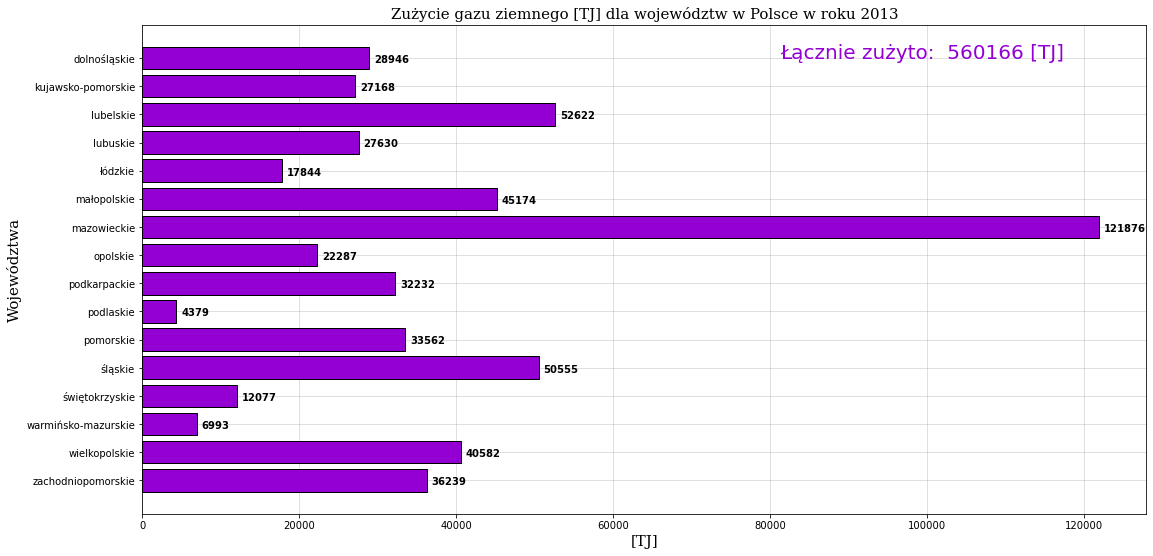

In [14]:
fig = plt.figure(figsize = (18,9))
tytul = {'family':'serif','color':'black','size':15}

def animuj(i):
    if (i == 0):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[TJ]', fontdict=tytul)
        plot1 = plt.barh(wojewodztwa[::-1],wartosciCiepla_2013[::-1], color = 'b', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie ciepła']):
            plt.text(v + max(df['Zużycie ciepła'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie ciepła'])) + ' [TJ]', 
             xy = (max(df['Zużycie ciepła'])/1.5, 15), size = 20, color = 'blue')
        plt.title('Zużycie ciepła [TJ] dla województw w Polsce w roku 2013', fontdict = tytul)
        return plot1
    if (i == 1):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot2 = plt.barh(wojewodztwa[::-1],wartosciCiezkiegoOlejuOpalowego_2013[::-1], color = 'g', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie ciężkiego oleju opałowego']):
            plt.text(v + max(df['Zużycie ciężkiego oleju opałowego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color= 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie ciężkiego oleju opałowego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie ciężkiego oleju opałowego'])/1.5, 15), size = 20, color = 'g')
        plt.title('Zużycie ciężkiego oleju opałowego [tys. ton] dla województw w Polsce w roku 2013',fontdict = tytul)
        return plot2
    if (i == 2):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot3 = plt.barh(wojewodztwa[::-1],wartosciLekkiegoOlejuOpalowego_2013[::-1], color = 'r', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie lekkiego oleju opałowego']):
            plt.text(v + max(df['Zużycie lekkiego oleju opałowego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie lekkiego oleju opałowego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie lekkiego oleju opałowego'])/1.5, 15), size = 20, color = 'r')
        plt.title('Zużycie lekkiego oleju opałowego [tys. ton] dla województw w Polsce w roku 2013',fontdict = tytul)
        return plot3
    if (i == 3):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[GWh]', fontdict=tytul)
        plot4 = plt.barh(wojewodztwa[::-1],wartosciEnergiiElektrycznej_2013[::-1], color = 'orange', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie energii elektrycznej']):
            plt.text(v + max(df['Zużycie energii elektrycznej'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie energii elektrycznej'])) + ' [GWh]', 
             xy = (max(df['Zużycie energii elektrycznej'])/1.5, 15), size = 20, color = 'orange')
        plt.title('Zużycie energii elektrycznej [GWh] dla województw w Polsce w roku 2013',fontdict = tytul)
        return plot4
    if (i == 4):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot5 = plt.barh(wojewodztwa[::-1],wartosciGazuCieklego_2013[::-1], color = 'silver', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie gazu ciekłego']):
            plt.text(v + max(df['Zużycie gazu ciekłego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie gazu ciekłego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie gazu ciekłego'])/1.5, 15), size = 20, color = 'silver')
        plt.title('Zużycie gazu ciekłego [tys. ton] dla województw w Polsce w roku 2013',fontdict = tytul)
        return plot5
    if (i == 5):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[TJ]', fontdict=tytul)
        plot6 = plt.barh(wojewodztwa[::-1],wartosciGazuZiemnego_2013[::-1], color = 'darkviolet', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie gazu ziemnego']):
            plt.text(v + max(df['Zużycie gazu ziemnego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie gazu ziemnego'])) + ' [TJ]', 
             xy = (max(df['Zużycie gazu ziemnego'])/1.5, 15), size = 20, color = 'darkviolet')
        plt.title('Zużycie gazu ziemnego [TJ] dla województw w Polsce w roku 2013',fontdict = tytul)
        return plot6
    if (i == 6):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot7 = plt.barh(wojewodztwa[::-1],wartosciWeglaKamiennego_2013[::-1], color = 'brown', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie węgla kamiennego']):
            plt.text(v + max(df['Zużycie węgla kamiennego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie węgla kamiennego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie węgla kamiennego'])/1.5, 15), size = 20, color = 'brown')
        plt.title('Zużycie węgla kamiennego [tys. ton] dla województw w Polsce w roku 2013',fontdict = tytul)
        return plot7
    
    
anim = FuncAnimation(fig, animuj, frames=6, interval=10000)
anim.save('Zużycie paliw w roku 2013.gif',dpi = 250)